Importing libraries

NumPy: utilized for high-performance vector arithmetic.

Pandas: utilized for dataset management and cleaning.

Matplotlib: utilized for generating graphical visualizations.

KNNClassifier: a custom built class implementation for the k nearest neighbors logic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.k_means import KMeans

I chose a classic dataset suitable for classification. \
The Wines dataset fits this criterion well and is perfect for demonstrating the k-nearest-neighboars classifier.

General dataset statistics:

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


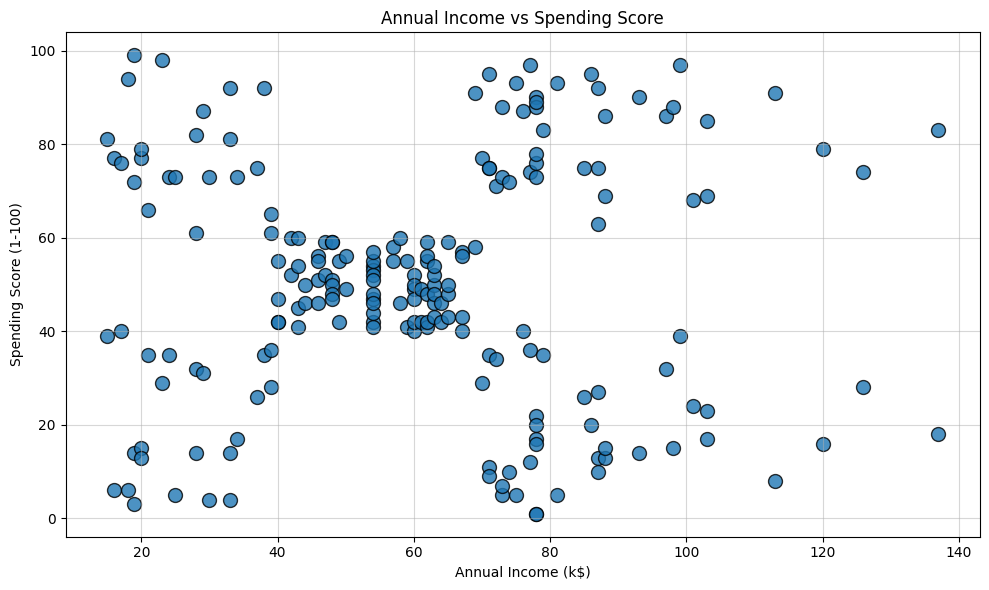

In [5]:
# --- 1. Load Data ---
FILE_PATH = '../datasets/mall_customers.csv'

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file at {FILE_PATH} was not found.")
    exit()


# --- 2. Data Cleaning ---
# dropping useless column
df_numeric = df.drop('CustomerID', axis=1)
# Convert Gender to 0 and 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


# --- 3. Analysis ---
# Since there is no 'class' yet, we look at the overall stats
print("General dataset statistics:\n")
print(df_numeric.describe())


# --- 4. Visualization ---
plt.figure(figsize=(10, 6))

# Plotting Annual Income vs Spending Score
plt.scatter(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    edgecolors='black', 
    alpha=0.8,
    s=100,
)

plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()